# Pre-process Allen Brain electrophysiology data

In [1]:
%matplotlib inline

import os
import sys
notebook_path = os.path.abspath('')
sources_path = os.path.abspath(os.path.join(notebook_path, 'sources'))
sys.path.insert(0, sources_path)

import numpy as np
import matplotlib.pylab as plt

from allensdk.core.cell_types_cache import CellTypesCache

from allen_data import ProcessedAllenNeuronElectrophysiology

In [3]:
optosynth_data_path = '/home/jupyter/mb-ml-data/Optosynth'

In [4]:
electrophysiology_output_path = os.path.join(optosynth_data_path, 'processed_electrophysiology')
if not os.path.exists(electrophysiology_output_path):
    os.mkdir(electrophysiology_output_path)

In [5]:
ctc = CellTypesCache(manifest_file=os.path.join(optosynth_data_path, 'allen_data', 'manifest.json'))
cell_ids = np.load(os.path.join(optosynth_data_path, 'allen_data', 'good_cell_ids.npy'))

In [ ]:
proc_cell_ids = []
proc_sweep_indices = []
proc_stim_amps = []
proc_n_spikes = []
bad_cell_ids = []

for idx, cell_id in enumerate(cell_ids):
    
    print(f'Processing cell #{idx + 1} ({cell_id}) ...')
    ephys = ctc.get_ephys_data(cell_id)
    
    try:
        
        p = ProcessedAllenNeuronElectrophysiology.from_electrophysiology(cell_id, ephys)
        n_sweeps = p.n_sweeps
        assert n_sweeps > 0
        
        # save
        p.save(electrophysiology_output_path)
        
        # populate summary table
        proc_cell_ids += ([p.cell_id] * n_sweeps)
        proc_sweep_indices += list(range(n_sweeps))
        proc_stim_amps += p.stim_amp_list
        proc_n_spikes += p.n_spikes_list

    except:
        
        bad_cell_ids.append(cell_id)

In [ ]:
import pandas as pd

proc_sweep_summary = np.asarray(
    [proc_cell_ids,
     proc_sweep_indices,
     proc_stim_amps,
     proc_n_spikes]).T

proc_sweep_summary_df = pd.DataFrame(
    list(zip(
        proc_cell_ids, proc_sweep_indices, proc_stim_amps, proc_n_spikes)),
    columns=['cell_id', 'sweep_index', 'stim_amp', 'n_spikes'])

proc_sweep_summary_df.to_csv(
    os.path.join(optosynth_data_path, 'processed_electrophysiology_summary.csv'))

Text(0, 0.5, 'voltage (mV)')

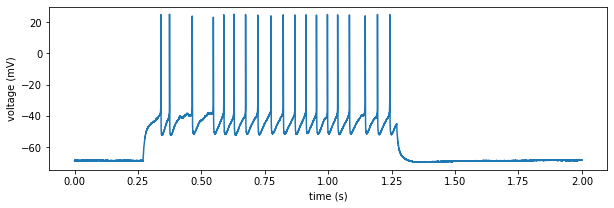

In [9]:
cell_id = cell_ids[20]
p = ProcessedAllenNeuronElectrophysiology.from_file(
    os.path.join(electrophysiology_output_path, f'{cell_id}_processed_electrophysiology.pkl'))
fig = plt.figure(figsize=(10, 3))
ax = plt.gca()
ax.plot(p.time_list[-8], p.voltage_list[-8])
ax.set_xlabel('time (s)')
ax.set_ylabel('voltage (mV)')